In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('float_format', '{:f}'.format)

In [10]:
from utils import *

In [21]:
def get_cols(df: pd.DataFrame) -> tuple:
    numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
    categorical_columns = df.select_dtypes(exclude=np.number).columns.tolist()

    return numeric_columns, categorical_columns

# *balances*

In [2]:
"""
PERIODO - Periodo de extracción de los datos
ID - Identificador único

CANT_EMP_NEG - Cantidad de empresas de negocio
CANT_EMP_CONS - Cantidad de empresas de consumo
CANT_EMP_HIPOT - Cantidad de empresas hipotecario
    * last
    * variable para ver si cerro o abrio empresas en los ultimos 9 meses

SALDO_MED_EMP - Saldo en mediana empresa
SALDO_PEQ_EMP - Saldo en pequeña empresa
SALDO_MIC_EMP - Saldo en micro empresa
    * categorica para saber que tipo de empresa tiene
    * last
    * variacion promedio de los saldos en los saldos que tiene

SALDO_CONS_REV - Saldo Consumo revolvente
SALDO_CONS_NO_REV - Saldo Consumo NO revolvente
    
SALDO_HIPOT - Saldo en hipotecario
SALDO_VENCIDO - Saldo vencido

CANT_EMP_DOL_NEG - Cantidad de empresas de negocios en dólares
SALDO_DOLA_NEG - Saldo en dólares de negocio
CANT_EMP_DOL_CONS - Cantidad de empresas de consumo en dólares
SALDO_DOLA_CONS - Saldo en dólares de consumo
CANT_EMP_DOL_HIPOT - Cantidad de empresas de hipotecario en dólares
SALDO_DOLA_HIPOT - Saldo en dólares de hipotecario
MAX_LINEA_DISP_U6M - Línea Máxima disponible en los últimos 6 meses
"""


'\nPERIODO - Periodo de extracción de los datos\nID - Identificador único\n\nCANT_EMP_NEG - Cantidad de empresas de negocio\nCANT_EMP_CONS - Cantidad de empresas de consumo\nCANT_EMP_HIPOT - Cantidad de empresas hipotecario\n    * last\n    * variable para ver si cerro o abrio empresas en los ultimos 9 meses\n\nSALDO_MED_EMP - Saldo en mediana empresa\nSALDO_PEQ_EMP - Saldo en pequeña empresa\nSALDO_MIC_EMP - Saldo en micro empresa\n    * categorica para saber que tipo de empresa tiene\n    * last\n    * variacion promedio de los saldos en los saldos que tiene\n\nSALDO_CONS_REV - Saldo Consumo revolvente\nSALDO_CONS_NO_REV - Saldo Consumo NO revolvente\n    \nSALDO_HIPOT - Saldo en hipotecario\nSALDO_VENCIDO - Saldo vencido\n\nCANT_EMP_DOL_NEG - Cantidad de empresas de negocios en dólares\nSALDO_DOLA_NEG - Saldo en dólares de negocio\nCANT_EMP_DOL_CONS - Cantidad de empresas de consumo en dólares\nSALDO_DOLA_CONS - Saldo en dólares de consumo\nCANT_EMP_DOL_HIPOT - Cantidad de empresas 

In [5]:
df_balances = pd.read_csv('../data/raw/balances_v2.csv')

## EDA

In [6]:
df_balances.head()

,PERIODO,ID,CANT_EMP_NEG,CANT_EMP_CONS,CANT_EMP_HIPOT,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,SALDO_HIPOT,SALDO_VENCIDO,CANT_EMP_DOL_NEG,SALDO_DOLA_NEG,CANT_EMP_DOL_CONS,SALDO_DOLA_CONS,CANT_EMP_DOL_HIPOT,SALDO_DOLA_HIPOT,MAX_LINEA_DISP_U6M
0,202301,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,405.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000
1,202302,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,346.566600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000
2,202303,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,283.086900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000
3,202304,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,217.987200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000
4,202305,858130171a01415f93d40802fc9e192d,1,0,0,0.000000,0.000000,148.942800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000


In [7]:
df_balances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367748 entries, 0 to 1367747
Data columns (total 19 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   PERIODO             1367748 non-null  int64  
 1   ID                  1367748 non-null  object 
 2   CANT_EMP_NEG        1367748 non-null  int64  
 3   CANT_EMP_CONS       1367748 non-null  int64  
 4   CANT_EMP_HIPOT      1367748 non-null  int64  
 5   SALDO_MED_EMP       1367748 non-null  float64
 6   SALDO_PEQ_EMP       1367748 non-null  float64
 7   SALDO_MIC_EMP       1367748 non-null  float64
 8   SALDO_CONS_REV      1367748 non-null  float64
 9   SALDO_CONS_NO_REV   1367748 non-null  float64
 10  SALDO_HIPOT         1367748 non-null  float64
 11  SALDO_VENCIDO       1367748 non-null  float64
 12  CANT_EMP_DOL_NEG    1367748 non-null  float64
 13  SALDO_DOLA_NEG      1367748 non-null  float64
 14  CANT_EMP_DOL_CONS   1367748 non-null  float64
 15  SALDO_DOLA_CONS

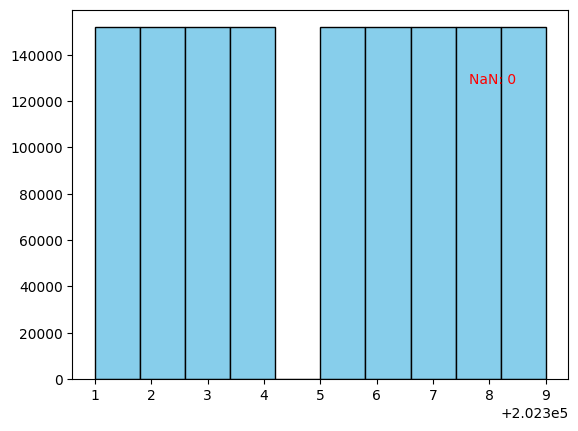

In [11]:
do_hist(df_balances,'PERIODO')

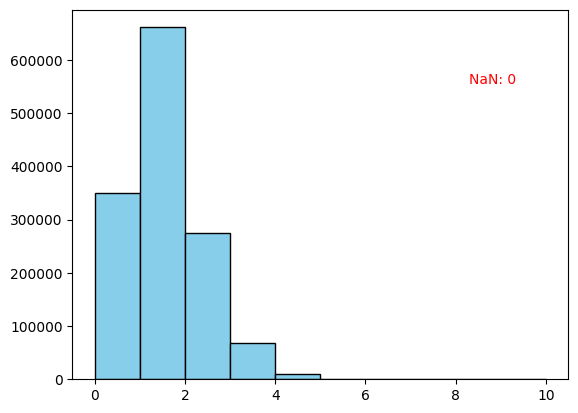

In [12]:
do_hist(df_balances,'CANT_EMP_NEG')

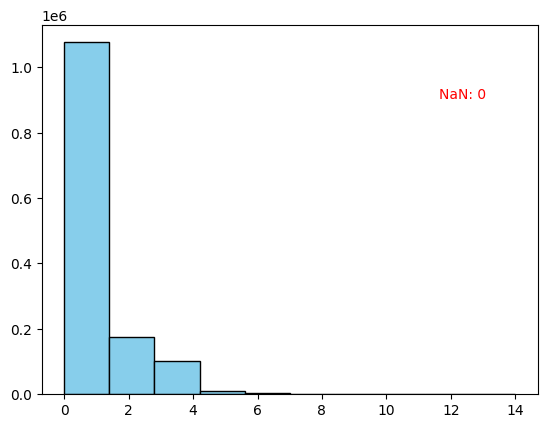

In [13]:
do_hist(df_balances,'CANT_EMP_CONS')

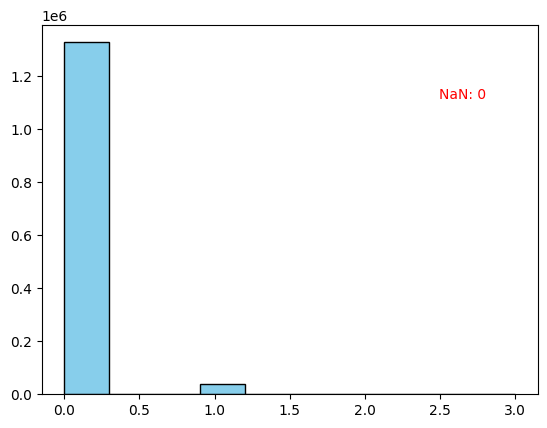

In [15]:
do_hist(df_balances,'CANT_EMP_HIPOT')

In [19]:
df_balances['SALDO_EMP_TOTAL'] = df_balances['SALDO_MED_EMP'] + df_balances['SALDO_PEQ_EMP'] + df_balances['SALDO_MIC_EMP'] + df_balances['SALDO_HIPOT'] + df_balances['SALDO_CONS_REV'] + df_balances['SALDO_CONS_NO_REV']

df_balances['SALDO_EMP_TOTAL-VENCIDO'] = df_balances['SALDO_EMP_TOTAL'] - df_balances['SALDO_VENCIDO']
df_balances['SALDO_REV_NO_REV-VENCIDO'] = df_balances['SALDO_CONS_REV'] + df_balances['SALDO_CONS_NO_REV'] - df_balances['SALDO_VENCIDO']
df_balances['SALDO_TOTAL-VENCIDO'] = df_balances['SALDO_EMP_TOTAL'] + df_balances['SALDO_CONS_REV'] + df_balances['SALDO_CONS_NO_REV'] - df_balances['SALDO_VENCIDO']

In [16]:
df_balances['TIENE_SALDO_VENCIDO'] = 0
indexes_SALDO_VENCIDO = df_balances[df_balances['SALDO_VENCIDO'] > 0].index
df_balances.loc[indexes_SALDO_VENCIDO, 'TIENE_SALDO_VENCIDO'] = 1
df_balances['CANT_MESES_SALDO_VENCIDO'] = df_balances.groupby('ID')['TIENE_SALDO_VENCIDO'].transform('sum')
df_balances = df_balances.drop(columns=['TIENE_SALDO_VENCIDO'])

In [17]:
# 'SALDO_EMP_TOTAL', 'SALDO_PEQ_EMP', 'SALDO_MED_EMP', 'SALDO_MIC_EMP', 'SALDO_CONS_REV', 'SALDO_CONS_NO_REV', 'SALDO_HIPOT', 'SALDO_VENCIDO'

for col in ['SALDO_EMP_TOTAL', 'SALDO_EMP_TOTAL-VENCIDO', 'SALDO_REV_NO_REV-VENCIDO', 'SALDO_TOTAL-VENCIDO']:
    print(col)
    df_balances[f'VAR_{col}_MA9'] = df_balances.groupby('ID')[f'{col}'].transform(lambda x: x.diff().rolling(window=9).mean())
    
df_balances.head(9*4)

SALDO_EMP_TOTAL


KeyError: 'Column not found: SALDO_EMP_TOTAL'

In [23]:
df_balances.to_parquet('../data/processed/balances_v2.gzip', compression='gzip')

<Axes: >

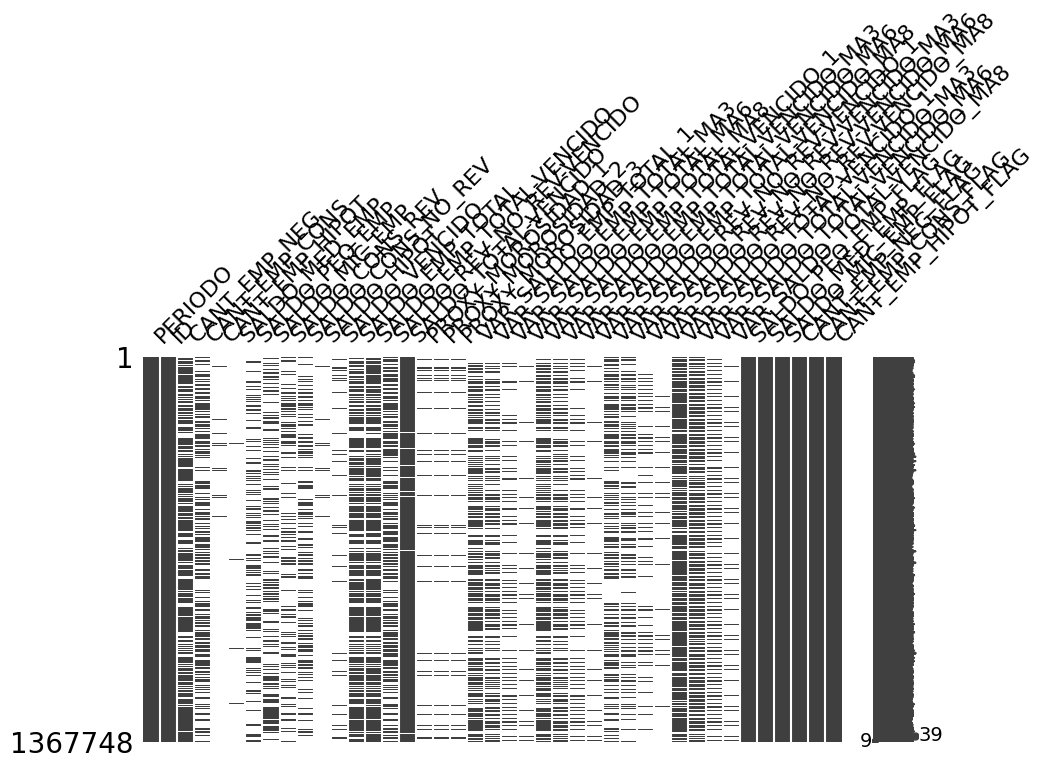

In [18]:
df_aux = df_balances.copy().replace(0, np.nan)
msno.matrix(df_aux, figsize=(10, 5))

In [26]:
df_balances.columns

Index(['PERIODO', 'ID', 'CANT_EMP_NEG', 'CANT_EMP_CONS', 'CANT_EMP_HIPOT',
       'SALDO_MED_EMP', 'SALDO_PEQ_EMP', 'SALDO_MIC_EMP', 'SALDO_CONS_REV',
       'SALDO_CONS_NO_REV', 'SALDO_HIPOT', 'SALDO_VENCIDO', 'SALDO_EMP_TOTAL',
       'SALDO_EMP_TOTAL-VENCIDO', 'SALDO_REV_NO_REV-VENCIDO',
       'SALDO_TOTAL-VENCIDO', 'CANT_MESES_SALDO_VENCIDO',
       'VAR_SALDO_EMP_TOTAL_MA8', 'VAR_SALDO_EMP_TOTAL-VENCIDO_MA8',
       'VAR_SALDO_REV_NO_REV-VENCIDO_MA8', 'VAR_SALDO_TOTAL-VENCIDO_MA8'],
      dtype='object')

In [ ]:
"""
CANT_EMP_DOL_NEG - Cantidad de empresas de negocios en dólares
SALDO_DOLA_NEG - Saldo en dólares de negocio
CANT_EMP_DOL_CONS - Cantidad de empresas de consumo en dólares
SALDO_DOLA_CONS - Saldo en dólares de consumo
CANT_EMP_DOL_HIPOT - Cantidad de empresas de hipotecario en dólares
SALDO_DOLA_HIPOT - Saldo en dólares de hipotecario
MAX_LINEA_DISP_U6M - Línea Máxima disponible en los últimos 6 meses
"""

In [20]:
df_balances_unirow = df_balances.groupby('ID').agg(
    {
        'CANT_EMP_NEG': ['mean'],
        'CANT_EMP_CONS': ['mean'],
        'CANT_EMP_HIPOT': ['mean'],
        'CANT_MESES_SALDO_VENCIDO': ['max'],
        'SALDO_MED_EMP': ['mean'],
        'SALDO_PEQ_EMP': ['mean'],
        'SALDO_MIC_EMP': ['mean'],
        'SALDO_CONS_REV': ['mean'],
        'SALDO_CONS_NO_REV': ['mean'],
        'SALDO_HIPOT': ['mean'],
        'SALDO_VENCIDO': ['mean'],

        #'SALDO_EMP_TOTAL': ['mean'],

        #'VAR_SALDO_EMP_TOTAL_MA8' : ['mean'], 
        #'VAR_SALDO_EMP_TOTAL-VENCIDO_MA8' : ['mean'],
        #'VAR_SALDO_REV_NO_REV-VENCIDO_MA8' : ['mean'],
        #'VAR_SALDO_TOTAL-VENCIDO_MA8' : ['mean'],
        'CANT_EMP_DOL_NEG': ['mean'], 
        'SALDO_DOLA_NEG': ['mean'], 
        'CANT_EMP_DOL_CONS': ['mean'], 
        'SALDO_DOLA_CONS': ['mean'], 
        'CANT_EMP_DOL_HIPOT': ['mean'], 
        'SALDO_DOLA_HIPOT': ['mean'], 

        'SALDO_DOLA_HIPOT': ['sum'],
        'MAX_LINEA_DISP_U6M': ['max', 'mean']

    }
).replace([np.inf, -np.inf], np.nan).fillna(0)

df_balances_unirow.columns = ['_'.join(col) for col in df_balances_unirow.columns.values]
df_balances_unirow = df_balances_unirow.reset_index()

df_balances_unirow

,ID,CANT_EMP_NEG_mean,CANT_EMP_CONS_mean,CANT_EMP_HIPOT_mean,CANT_MESES_SALDO_VENCIDO_max,SALDO_MED_EMP_mean,SALDO_PEQ_EMP_mean,SALDO_MIC_EMP_mean,SALDO_CONS_REV_mean,SALDO_CONS_NO_REV_mean,SALDO_HIPOT_mean,SALDO_VENCIDO_mean,CANT_EMP_DOL_NEG_mean,SALDO_DOLA_NEG_mean,CANT_EMP_DOL_CONS_mean,SALDO_DOLA_CONS_mean,CANT_EMP_DOL_HIPOT_mean,SALDO_DOLA_HIPOT_sum,MAX_LINEA_DISP_U6M_max,MAX_LINEA_DISP_U6M_mean
0,00000ae64b2d4ea7b318f3caa49fb832,1.000000,0.000000,0.000000,9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26052.711556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,00002e673be949b1afe485e71ff71048,1.000000,0.000000,0.000000,9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,680.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0000e7adc30c476ba07265c60676562c,2.000000,2.000000,0.000000,0,0.000000,38978.653689,0.000000,0.000000,27035.078167,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5896.000000,5896.000000
3,00014b0427554bbbad91e0d8aeab3118,2.000000,0.000000,0.000000,0,0.000000,42683.458622,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0001efa922ff405384514b5c6ed18294,0.777778,1.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,4329.417411,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151967,fffe81ac4d864cf5b21d80e1b39b6bde,1.111111,0.000000,0.000000,0,0.000000,0.000000,13691.889000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
151968,fffebeece7e3462c9ecd043d93bf8828,2.666667,0.000000,0.000000,0,0.000000,0.000000,12296.196000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
151969,ffff32ee7ea247bab950cfc94c7ba402,0.000000,1.777778,0.000000,0,0.000000,0.000000,0.000000,143.507000,6777.638900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6322.580000,5696.398889
151970,ffff49668d014875a2c5af50ac42695a,0.000000,1.555556,0.000000,0,0.000000,0.000000,0.000000,1780.832589,11605.451944,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25429.382000,25399.396000


In [22]:
nc, cc = get_cols(df_balances_unirow)
df_balances_unirow[nc].std(numeric_only=True).reset_index().sort_values(by=0, ascending=False)

,index,0
9,SALDO_HIPOT_mean,46381.911329
16,SALDO_DOLA_HIPOT_sum,44965.812089
4,SALDO_MED_EMP_mean,41377.176979
8,SALDO_CONS_NO_REV_mean,39816.637510
17,MAX_LINEA_DISP_U6M_max,37033.184069
18,MAX_LINEA_DISP_U6M_mean,34285.170075
5,SALDO_PEQ_EMP_mean,28713.587742
10,SALDO_VENCIDO_mean,12407.132689
14,SALDO_DOLA_CONS_mean,9011.327342
6,SALDO_MIC_EMP_mean,7361.223768


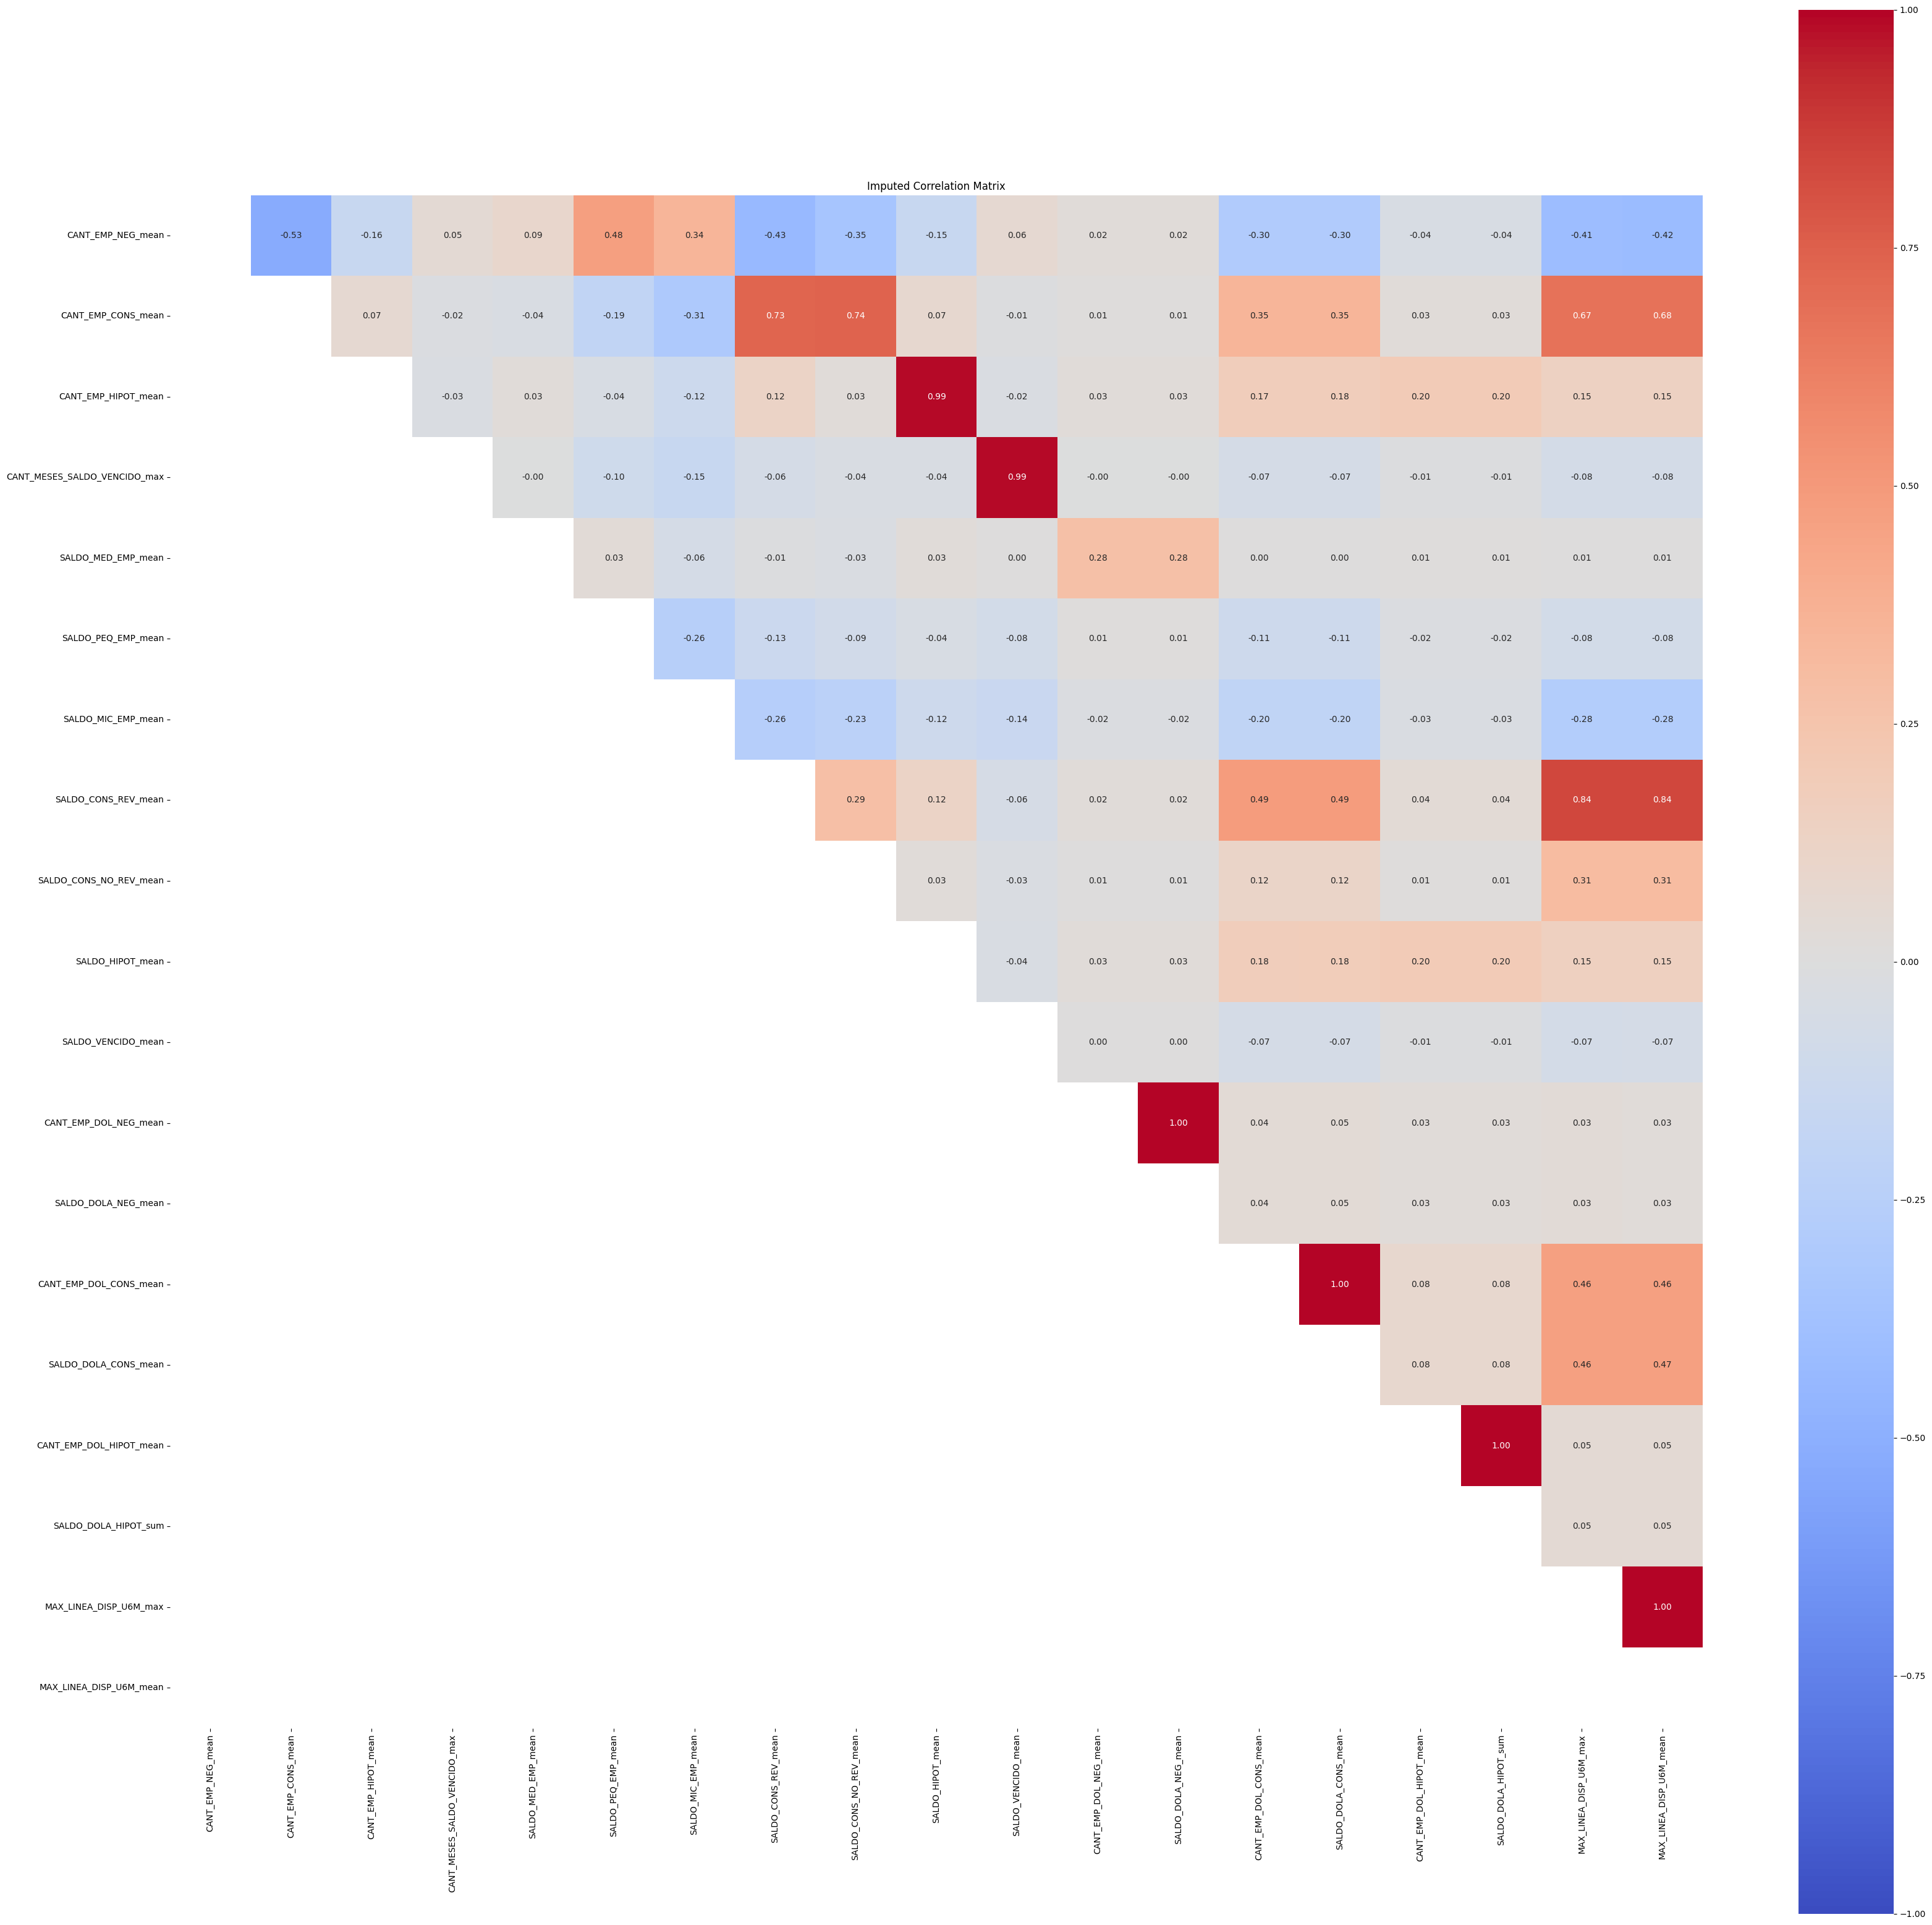

In [23]:
import numpy as np

corr_mat = df_balances_unirow[nc].corr(method='spearman')
mask = np.tril(np.ones_like(corr_mat, dtype=bool))  # create a mask to hide the lower triangle of the heatmap
plt.figure(figsize=(40, 40))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, fmt='.2f', mask=mask)  # add the mask to the heatmap
plt.title('Imputed Correlation Matrix')
plt.show()

# *customers*

In [24]:
df_customers = (
    pd.read_csv('../data/raw/customers.csv')
    .assign(
        PER_BANCARIZACION = lambda row: row['PER_BANCARIZACION'].astype(str)
    )
    .assign(
        ANIO_BANCARIZACION = lambda row: row['PER_BANCARIZACION'].str[:4],
        MES_BANCARIZACION = lambda row: row['PER_BANCARIZACION'].str[5:7]
    )
    .assign(
        ANIO_BANCARIZACION = lambda row: row['ANIO_BANCARIZACION'].astype(int),
        MES_BANCARIZACION = lambda row: row['MES_BANCARIZACION'].astype(int)
    )
    .drop(columns=['PER_BANCARIZACION'])
)
df_customers['CO_TIPO_SEXO'] = df_customers['CO_TIPO_SEXO'].astype('category')

df_customers

,ID,CO_TIPO_SEXO,EDAD,NO_DEPARTAMENTO,NO_PROVINCIA,DE_CIIU,ANIO_BANCARIZACION,MES_BANCARIZACION
0,8bd775237f2f4c7cae87c255e9e71d62,1,48.000000,CAJAMARCA,CONTUMAZA,OTRAS ACTIVIDADES NO CLASIFICAD.EN OTRA PARTE\r\n,2013,7
1,2409b242893e4ea4b7e6af1292030666,3,NaN,NaN,NaN,OTRAS ACTIVIDADES NO CLASIFICAD.EN OTRA PARTE\r\n,2017,9
2,65edb7eb9d144b2184ef76ec2c35cdf8,1,38.000000,NaN,NaN,OTRAS ACTIVIDADES NO CLASIFICAD.EN OTRA PARTE\r\n,2008,2
3,2fef711096234036807b01a5a697a81c,1,61.000000,TACNA,TACNA,"VTA. MIN. ALIMENTOS, BEBIDAS, TABACO.",2006,1
4,796443da390d409ba3e7b775fde576cd,3,29.000000,LAMBAYEQUE,CHICLAYO,OTRAS ACTIVID.DE TIPO SERVICIO NCP,2014,6
...,...,...,...,...,...,...,...,...
151967,54a73b9c515f46d19c0182e3f44f44fe,3,25.000000,NaN,NaN,VTA. MIN. PROD. FARMAC. Y ART. TOCADOR.,2021,8
151968,1df55d6b6af544b58312d68241a10e4f,3,32.000000,LAMBAYEQUE,CHICLAYO,TRANSPORTE DE CARGA POR CARRETERA.,2018,9
151969,5dd4a95d877d4474a277173c6fe4d227,1,62.000000,NaN,NaN,TRANSPORTE DE CARGA POR CARRETERA.,2006,1
151970,cbad53becdb042cfb98a992566ec0e94,2,51.000000,NaN,NaN,OTROS TIPOS DE VENTA AL POR MENOR.,2013,2


In [28]:
nc

['CANT_EMP_NEG_mean',
 'CANT_EMP_CONS_mean',
 'CANT_EMP_HIPOT_mean',
 'CANT_MESES_SALDO_VENCIDO_max',
 'SALDO_MED_EMP_mean',
 'SALDO_PEQ_EMP_mean',
 'SALDO_MIC_EMP_mean',
 'SALDO_CONS_REV_mean',
 'SALDO_CONS_NO_REV_mean',
 'SALDO_HIPOT_mean',
 'SALDO_VENCIDO_mean',
 'CANT_EMP_DOL_NEG_mean',
 'SALDO_DOLA_NEG_mean',
 'CANT_EMP_DOL_CONS_mean',
 'SALDO_DOLA_CONS_mean',
 'CANT_EMP_DOL_HIPOT_mean',
 'SALDO_DOLA_HIPOT_sum',
 'MAX_LINEA_DISP_U6M_max',
 'MAX_LINEA_DISP_U6M_mean']

In [27]:
from sklearn.impute import KNNImputer

In [30]:
nc, cc = get_cols(df_customers)

In [31]:
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputed_customers = knn_imputer.fit_transform(df_customers[nc])

In [34]:
df_imputed_customers = pd.DataFrame(imputed_customers, columns=nc)

In [35]:
df_imputed_customers.head()

,EDAD,ANIO_BANCARIZACION,MES_BANCARIZACION
0,48.000000,2013.000000,7.000000
1,47.400000,2017.000000,9.000000
2,38.000000,2008.000000,2.000000
3,61.000000,2006.000000,1.000000
4,29.000000,2014.000000,6.000000


In [36]:
df_customers['EDAD'] = df_imputed_customers['EDAD']
df_customers['ANIO_BANCARIZACION'] = df_imputed_customers['ANIO_BANCARIZACION']
df_customers['MES_BANCARIZACION'] = df_imputed_customers['MES_BANCARIZACION']

In [38]:
df_customers.head()

,ID,CO_TIPO_SEXO,EDAD,NO_DEPARTAMENTO,NO_PROVINCIA,DE_CIIU,ANIO_BANCARIZACION,MES_BANCARIZACION
0,8bd775237f2f4c7cae87c255e9e71d62,1,48.000000,CAJAMARCA,CONTUMAZA,OTRAS ACTIVIDADES NO CLASIFICAD.EN OTRA PARTE\r\n,2013.000000,7.000000
1,2409b242893e4ea4b7e6af1292030666,3,47.400000,NaN,NaN,OTRAS ACTIVIDADES NO CLASIFICAD.EN OTRA PARTE\r\n,2017.000000,9.000000
2,65edb7eb9d144b2184ef76ec2c35cdf8,1,38.000000,NaN,NaN,OTRAS ACTIVIDADES NO CLASIFICAD.EN OTRA PARTE\r\n,2008.000000,2.000000
3,2fef711096234036807b01a5a697a81c,1,61.000000,TACNA,TACNA,"VTA. MIN. ALIMENTOS, BEBIDAS, TABACO.",2006.000000,1.000000
4,796443da390d409ba3e7b775fde576cd,3,29.000000,LAMBAYEQUE,CHICLAYO,OTRAS ACTIVID.DE TIPO SERVICIO NCP,2014.000000,6.000000


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier


In [63]:
df_conocidos = df_customers.dropna(subset=['NO_DEPARTAMENTO'])
df_desconocidos = df_customers[df_customers['NO_DEPARTAMENTO'].isnull()]

x = df_conocidos.drop(columns=['ID', 'NO_DEPARTAMENTO','NO_PROVINCIA'], axis=1)
y = df_conocidos['NO_DEPARTAMENTO']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

cat_features = ['DE_CIIU', 'CO_TIPO_SEXO']
modelo = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='MultiClass', random_state=42, cat_features=cat_features)
modelo.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=10, verbose=False)

# Realiza predicciones en los datos desconocidos


In [64]:
#df_desconocidos[cat_features] = df_desconocidos[cat_features].astype('category')

df_desconocidos = df_customers[df_customers['NO_DEPARTAMENTO'].isnull()]
predicciones = modelo.predict(df_desconocidos.drop(['NO_DEPARTAMENTO', 'ID', 'NO_PROVINCIA'], axis=1))

# Asigna las predicciones al DataFrame original
df_customers.loc[df_customers['NO_DEPARTAMENTO'].isnull(), 'NO_DEP_IMPUTED'] = predicciones
df_customers.loc[df_customers['NO_DEPARTAMENTO'].isnull(), 'NO_DEPARTAMENTO'] = df_customers.loc[df_customers['NO_DEPARTAMENTO'].isnull(), 'NO_DEP_IMPUTED']

In [68]:
df_customers = df_customers.drop(columns=['NO_DEP_IMPUTED'])
df_customers.head()

,ID,CO_TIPO_SEXO,EDAD,NO_DEPARTAMENTO,NO_PROVINCIA,DE_CIIU,ANIO_BANCARIZACION,MES_BANCARIZACION
0,8bd775237f2f4c7cae87c255e9e71d62,1,48.000000,CAJAMARCA,CONTUMAZA,OTRAS ACTIVIDADES NO CLASIFICAD.EN OTRA PARTE\r\n,2013.000000,7.000000
1,2409b242893e4ea4b7e6af1292030666,3,47.400000,CAJAMARCA,NaN,OTRAS ACTIVIDADES NO CLASIFICAD.EN OTRA PARTE\r\n,2017.000000,9.000000
2,65edb7eb9d144b2184ef76ec2c35cdf8,1,38.000000,LAMBAYEQUE,NaN,OTRAS ACTIVIDADES NO CLASIFICAD.EN OTRA PARTE\r\n,2008.000000,2.000000
3,2fef711096234036807b01a5a697a81c,1,61.000000,TACNA,TACNA,"VTA. MIN. ALIMENTOS, BEBIDAS, TABACO.",2006.000000,1.000000
4,796443da390d409ba3e7b775fde576cd,3,29.000000,LAMBAYEQUE,CHICLAYO,OTRAS ACTIVID.DE TIPO SERVICIO NCP,2014.000000,6.000000


In [71]:
df_conocidos = df_customers.dropna(subset=['NO_PROVINCIA'])
df_desconocidos = df_customers[df_customers['NO_PROVINCIA'].isnull()]

x = df_conocidos.drop(columns=['ID', 'NO_PROVINCIA'], axis=1)
y = df_conocidos['NO_PROVINCIA']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

cat_features = ['DE_CIIU', 'CO_TIPO_SEXO', 'NO_DEPARTAMENTO']
modelo = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='MultiClass', random_state=42, cat_features=cat_features)
modelo.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=10, verbose=False)

df_desconocidos = df_customers[df_customers['NO_PROVINCIA'].isnull()]
predicciones = modelo.predict(df_desconocidos.drop(['NO_PROVINCIA', 'ID'], axis=1))

# Asigna las predicciones al DataFrame original
df_customers.loc[df_customers['NO_PROVINCIA'].isnull(), 'NO_PROV_IMPUTED'] = predicciones
df_customers.loc[df_customers['NO_PROVINCIA'].isnull(), 'NO_PROVINCIA'] = df_customers.loc[df_customers['NO_PROVINCIA'].isnull(), 'NO_PROVINCIA']

# *JOIN*

In [38]:
df_join = df_customers.drop(columns=['NO_DEPARTAMENTO', 'NO_PROVINCIA', 'DE_CIIU']).merge(
    df_balances_unirow, how='left', on='ID'
)

In [39]:
df_join['EDAD'].describe()

count   126566.000000
mean        46.586445
std         11.830842
min         19.000000
25%         38.000000
50%         45.000000
75%         55.000000
max        107.000000
Name: EDAD, dtype: float64

/tmp/ipykernel_11271/1546855181.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_join['EDAD'], shade=True)


<Axes: xlabel='EDAD', ylabel='Density'>

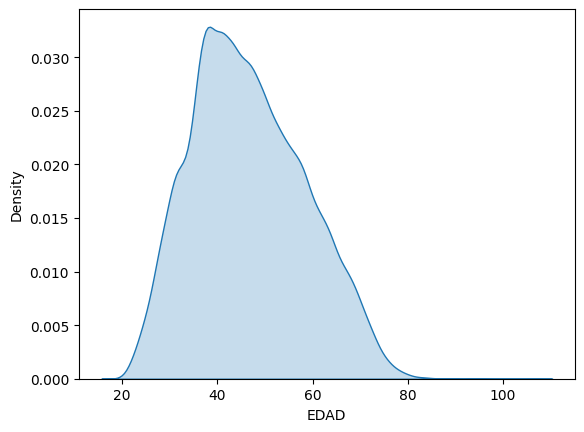

In [40]:
sns.kdeplot(df_join['EDAD'], shade=True)

In [20]:
# # fillna EDAD with KNN
# from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors=5)
# df_join['EDAD'] = imputer.fit_transform(df_join[['EDAD']])
# sns.kdeplot(df_join['EDAD'], shade=True)

In [41]:
df_join.isna().sum()

ID                                           0
CO_TIPO_SEXO                                 0
EDAD                                     25406
ANIO_BANCARIZACION                           0
MES_BANCARIZACION                            0
CANT_EMP_NEG_max                             0
CANT_EMP_NEG_last                            0
CANT_EMP_CONS_max                            0
CANT_EMP_CONS_last                           0
CANT_EMP_HIPOT_max                           0
CANT_EMP_HIPOT_last                          0
CANT_MESES_SALDO_VENCIDO_max                 0
SALDO_MED_EMP_mean                           0
SALDO_PEQ_EMP_mean                           0
SALDO_MIC_EMP_mean                           0
SALDO_CONS_REV_mean                          0
SALDO_CONS_NO_REV_mean                       0
SALDO_HIPOT_mean                             0
SALDO_VENCIDO_mean                           0
SALDO_EMP_TOTAL_mean                         0
VAR_SALDO_EMP_TOTAL_MA8_mean                 0
VAR_SALDO_EMP

In [42]:
nc, cc = get_cols(df_join)
df_join[nc].std(numeric_only=True).reset_index().sort_values(by=0, ascending=False)

,index,0
17,SALDO_EMP_TOTAL_mean,83345.504921
15,SALDO_HIPOT_mean,46381.911329
10,SALDO_MED_EMP_mean,41377.176979
14,SALDO_CONS_NO_REV_mean,39816.637510
11,SALDO_PEQ_EMP_mean,28713.587742
16,SALDO_VENCIDO_mean,12407.132689
21,VAR_SALDO_TOTAL-VENCIDO_MA8_mean,9601.550267
12,SALDO_MIC_EMP_mean,7361.223768
13,SALDO_CONS_REV_mean,6404.416168
19,VAR_SALDO_EMP_TOTAL-VENCIDO_MA8_mean,6305.111702


In [43]:
df_join.dtypes

ID                                         object
CO_TIPO_SEXO                             category
EDAD                                      float64
ANIO_BANCARIZACION                          int64
MES_BANCARIZACION                           int64
CANT_EMP_NEG_max                            int64
CANT_EMP_NEG_last                           int64
CANT_EMP_CONS_max                           int64
CANT_EMP_CONS_last                          int64
CANT_EMP_HIPOT_max                          int64
CANT_EMP_HIPOT_last                         int64
CANT_MESES_SALDO_VENCIDO_max                int64
SALDO_MED_EMP_mean                        float64
SALDO_PEQ_EMP_mean                        float64
SALDO_MIC_EMP_mean                        float64
SALDO_CONS_REV_mean                       float64
SALDO_CONS_NO_REV_mean                    float64
SALDO_HIPOT_mean                          float64
SALDO_VENCIDO_mean                        float64
SALDO_EMP_TOTAL_mean                      float64


In [44]:
df_train = pd.read_csv('../data/raw/train.csv').merge(df_join, how='left', on='ID')
df_test = pd.read_csv('../data/raw/test.csv').merge(df_join, how='left', on='ID')

In [45]:
df_test.isna().sum()

ID                                           0
TARGET                                   60789
CO_TIPO_SEXO                                 0
EDAD                                     10113
ANIO_BANCARIZACION                           0
MES_BANCARIZACION                            0
CANT_EMP_NEG_max                             0
CANT_EMP_NEG_last                            0
CANT_EMP_CONS_max                            0
CANT_EMP_CONS_last                           0
CANT_EMP_HIPOT_max                           0
CANT_EMP_HIPOT_last                          0
CANT_MESES_SALDO_VENCIDO_max                 0
SALDO_MED_EMP_mean                           0
SALDO_PEQ_EMP_mean                           0
SALDO_MIC_EMP_mean                           0
SALDO_CONS_REV_mean                          0
SALDO_CONS_NO_REV_mean                       0
SALDO_HIPOT_mean                             0
SALDO_VENCIDO_mean                           0
SALDO_EMP_TOTAL_mean                         0
VAR_SALDO_EMP

In [46]:
df_train.isna().sum()

ID                                           0
TARGET                                       0
CO_TIPO_SEXO                                 0
EDAD                                     15293
ANIO_BANCARIZACION                           0
MES_BANCARIZACION                            0
CANT_EMP_NEG_max                             0
CANT_EMP_NEG_last                            0
CANT_EMP_CONS_max                            0
CANT_EMP_CONS_last                           0
CANT_EMP_HIPOT_max                           0
CANT_EMP_HIPOT_last                          0
CANT_MESES_SALDO_VENCIDO_max                 0
SALDO_MED_EMP_mean                           0
SALDO_PEQ_EMP_mean                           0
SALDO_MIC_EMP_mean                           0
SALDO_CONS_REV_mean                          0
SALDO_CONS_NO_REV_mean                       0
SALDO_HIPOT_mean                             0
SALDO_VENCIDO_mean                           0
SALDO_EMP_TOTAL_mean                         0
VAR_SALDO_EMP

In [47]:
display(df_train['TARGET'].value_counts(normalize=True))
display(df_test['TARGET'].value_counts(normalize=True))

0   0.849994
1   0.150006
Name: TARGET, dtype: float64

Series([], Name: TARGET, dtype: float64)

In [49]:
df_train.to_parquet('../data/processed/train_v2.gzip', compression='gzip')
df_test.to_parquet('../data/processed/test_v2.gzip', compression='gzip')

In [51]:
df_test.isna().sum()

ID                                           0
TARGET                                   60789
CO_TIPO_SEXO                                 0
EDAD                                     10113
ANIO_BANCARIZACION                           0
MES_BANCARIZACION                            0
CANT_EMP_NEG_max                             0
CANT_EMP_NEG_last                            0
CANT_EMP_CONS_max                            0
CANT_EMP_CONS_last                           0
CANT_EMP_HIPOT_max                           0
CANT_EMP_HIPOT_last                          0
CANT_MESES_SALDO_VENCIDO_max                 0
SALDO_MED_EMP_mean                           0
SALDO_PEQ_EMP_mean                           0
SALDO_MIC_EMP_mean                           0
SALDO_CONS_REV_mean                          0
SALDO_CONS_NO_REV_mean                       0
SALDO_HIPOT_mean                             0
SALDO_VENCIDO_mean                           0
SALDO_EMP_TOTAL_mean                         0
VAR_SALDO_EMP

In [52]:
df_train.isna().sum()

ID                                           0
TARGET                                       0
CO_TIPO_SEXO                                 0
EDAD                                     15293
ANIO_BANCARIZACION                           0
MES_BANCARIZACION                            0
CANT_EMP_NEG_max                             0
CANT_EMP_NEG_last                            0
CANT_EMP_CONS_max                            0
CANT_EMP_CONS_last                           0
CANT_EMP_HIPOT_max                           0
CANT_EMP_HIPOT_last                          0
CANT_MESES_SALDO_VENCIDO_max                 0
SALDO_MED_EMP_mean                           0
SALDO_PEQ_EMP_mean                           0
SALDO_MIC_EMP_mean                           0
SALDO_CONS_REV_mean                          0
SALDO_CONS_NO_REV_mean                       0
SALDO_HIPOT_mean                             0
SALDO_VENCIDO_mean                           0
SALDO_EMP_TOTAL_mean                         0
VAR_SALDO_EMP

In [53]:
df_train['ID'].isin(df_balances['ID']).value_counts()

True    91183
Name: ID, dtype: int64

In [54]:
df_test['ID'].isin(df_balances['ID']).value_counts()

True    60789
Name: ID, dtype: int64

In [55]:
df_train['ID'].isin(df_customers['ID']).value_counts()

True    91183
Name: ID, dtype: int64

In [56]:
df_test['ID'].isin(df_customers['ID']).value_counts()

True    60789
Name: ID, dtype: int64

In [57]:
df_train.dtypes

ID                                         object
TARGET                                      int64
CO_TIPO_SEXO                             category
EDAD                                      float64
ANIO_BANCARIZACION                          int64
MES_BANCARIZACION                           int64
CANT_EMP_NEG_max                            int64
CANT_EMP_NEG_last                           int64
CANT_EMP_CONS_max                           int64
CANT_EMP_CONS_last                          int64
CANT_EMP_HIPOT_max                          int64
CANT_EMP_HIPOT_last                         int64
CANT_MESES_SALDO_VENCIDO_max                int64
SALDO_MED_EMP_mean                        float64
SALDO_PEQ_EMP_mean                        float64
SALDO_MIC_EMP_mean                        float64
SALDO_CONS_REV_mean                       float64
SALDO_CONS_NO_REV_mean                    float64
SALDO_HIPOT_mean                          float64
SALDO_VENCIDO_mean                        float64
